<a href="https://colab.research.google.com/github/knkamil/ml-practice-notebooks/blob/main/Week2_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM FORMULATION**

> **Business Objective:** Predict survival to improve rescue strategies

>**Objective:** Predict whether a passenger survived

> **Outcome:** Binary (Survived=0/1)

> **Metric:** Recall, as missing a survivor is critical













**Data Loading and Initial Exploration**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape

(891, 12)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Number of Missing Values

> Embarked has 2 missing values

> Age has 177 missing values

> Cabin has 687 missing values





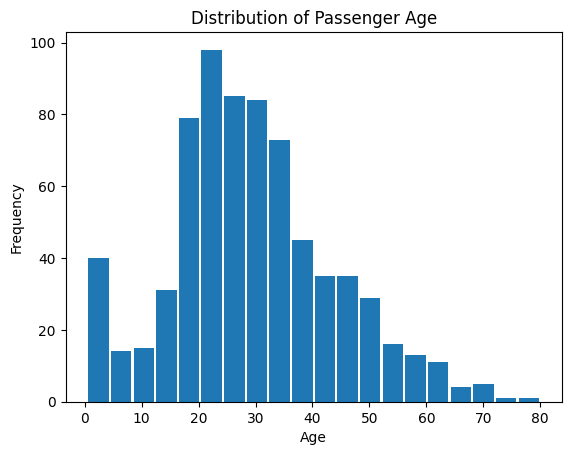

In [ ]:
# Plotting Histogram of Age

plt.hist(df['Age'].dropna(), bins = 20, rwidth = 0.9)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Passenger Age")
plt.show()

**Data Cleaning**

In [ ]:
# Calculate the mean age
mean_age = df['Age'].mean()

# Replace null values with mean
df['Age'] = df['Age'].fillna(mean_age)

In [ ]:
# Checking for Null values in age
df['Age'].isnull().sum()

np.int64(0)

In [ ]:
# Dropping rows that has null values in embarked
df = df.dropna(subset = ['Embarked'])

In [ ]:
# Checking for Null values in Embarked
df['Embarked'].isnull().sum()

np.int64(0)

In [ ]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Identifying and Removing Outliers in 'Fare' Using IQR Method

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_outliers = (df['Fare'] < lower_bound).sum()
upper_outliers = (df['Fare'] > upper_bound).sum()
total = lower_outliers + upper_outliers

lower_outliers, upper_outliers, total



(np.int64(0), np.int64(114), np.int64(114))

In [ ]:
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

lower_outliers = (df['Fare'] < lower_bound).sum()
upper_outliers = (df['Fare'] > upper_bound).sum()
total = lower_outliers + upper_outliers

lower_outliers, upper_outliers, total

(np.int64(0), np.int64(0), np.int64(0))

In [ ]:
df.shape

(775, 12)